# Final Project

## Libraries

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import glob, os
import re
import sys

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

Using TensorFlow backend.


## Importing Images

In [2]:
from PIL import Image
import glob
image_list = []
num_array = []
im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/small_images/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    image_list.append(imResize) # to display image example below
    im_array = np.array(imResize) # applies all resized images to array
    num_array.append(im_array) # appends all images to list 

num_array = np.array(num_array) # gets all images in an array

In [3]:
num_array.shape

(30, 224, 224, 3)

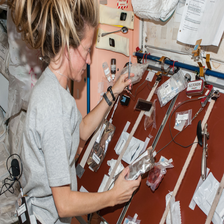

In [4]:
# displays first image
display(image_list[0])

## Cleaning Data

In [5]:
# setting up y_train variables
# 0 = karen nyberg, 1 = luca parmitano, 2 = sergey ryazanskiy, 3 = mike hopkins,
# 4 = andre kuipers, 5 = roman-romanen, 6 = chris cassidy, 7 = rick mastracchio, 8 = oleg novitskiy
# karen nyberg = [1,0,0,0,0,0,0,0,0]
# luca parmitano = [0,1,0,0,0,0,0,0,0]
# sergey ryazanskiy = [0,0,1,0,0,0,0,0,0]
# mike hopkins = [0,0,0,1,0,0,0,0,0]
# andre kuipers = [0,0,0,0,1,0,0,0,0]
# roman-romanen = [0,0,0,0,0,1,0,0,0]
# chris cassidy = [0,0,0,0,0,0,1,0,0]
# rick mastracchio = [0,0,0,0,0,0,0,1,0]
# oleg novitskiy = [0,0,0,0,0,0,0,0,1] 

# karen nyberg = 0, 13, 25, 27,   
# luca parmitano = 1, 4, 9, 11, 23, 
# sergey ryazanskiy = 2, 10, 16, 24, 28   
# mike hopkins = 3, 21, 22,   
# andre kuipers = 5, 8, 19, 
# roman-romanen = 6, 15, 18 
# chris cassidy = 7, 12, 
# rick mastracchio = 14, 26,  
# oleg novitskiy = 17, 20, 29

y_labels = [[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0],
          [0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,0,0],[1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0], [0,0,0,0,0,1,0,0,0], [0,0,1,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,1],
          [0,0,0,0,0,1,0,0,0],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1],[0,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0],[1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1]]
y_labels = np.asarray(y_labels)
y_labels.shape

(30, 9)

## Import Tim Images

In [6]:
from PIL import Image
import glob
tim_image_list = []
tim_num_array = []
tim_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Tim_Kopra/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    tim_image_list.append(imResize) # to display image example below
    tim_im_array = np.array(imResize) # applies all resized images to array
    tim_num_array.append(tim_im_array) # appends all images to list 

tim_num_array = np.array(tim_num_array) # gets all images in an array

In [7]:
tim_num_array.shape

(28, 224, 224, 3)

In [8]:
rows, cols = (28, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

arr[0][0] = 1
for rows in range(rows): 
    arr[rows][0] = 1
    #print(rows)
    
print(arr)

tim_arr = np.array(arr)

tim_arr.shape

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


(28, 10)

## Import Tom Images

In [9]:
from PIL import Image
import glob
tom_image_list = []
tom_num_array = []
tom_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Thomas_Marshburn/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    tom_image_list.append(imResize) # to display image example below
    tom_im_array = np.array(imResize) # applies all resized images to array
    tom_num_array.append(tom_im_array) # appends all images to list 

tom_num_array = np.array(tom_num_array) # gets all images in an array

In [10]:
tom_num_array.shape

(53, 224, 224, 3)

In [11]:
rows, cols = (53, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

arr[0][1] = 1
for rows in range(rows): 
    arr[rows][1] = 1
    #print(rows)
    
print(arr)

tom_arr = np.array(arr)

tom_arr.shape

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 

(53, 10)

## Import Sunita Images

In [12]:
from PIL import Image
import glob
sunita_image_list = []
sunita_num_array = []
sunita_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Sunita_Williams/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    sunita_image_list.append(imResize) # to display image example below
    sunita_im_array = np.array(imResize) # applies all resized images to array
    sunita_num_array.append(sunita_im_array) # appends all images to list 

sunita_num_array = np.array(sunita_num_array) # gets all images in an array

In [13]:
sunita_num_array.shape

(148, 224, 224, 3)

In [14]:
rows, cols = (148, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

arr[0][2] = 1
for rows in range(rows): 
    arr[rows][2] = 1
    #print(rows)
    
print(arr)

sunita_arr = np.array(arr)

sunita_arr.shape

[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 

(148, 10)

## Import Shannon Images

In [15]:
from PIL import Image
import glob
shannon_image_list = []
shannon_num_array = []
shannon_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Shannon_Walker/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    shannon_image_list.append(imResize) # to display image example below
    shannon_im_array = np.array(imResize) # applies all resized images to array
    shannon_num_array.append(shannon_im_array) # appends all images to list 

shannon_num_array = np.array(shannon_num_array) # gets all images in an array

In [16]:
shannon_num_array.shape

(82, 224, 224, 3)

In [17]:
## CHANGE THISSS VAR
rows, cols = (82, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

arr[0][3] = 1
for rows in range(rows): 
    arr[rows][3] = 1
    #print(rows)
    
print(arr)

shannon_arr = np.array(arr)

shannon_arr.shape

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 

(82, 10)

## Import Robert Images

In [18]:
from PIL import Image
import glob
robert_image_list = []
robert_num_array = []
robert_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Robert_Behnken/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    robert_image_list.append(imResize) # to display image example below
    robert_im_array = np.array(imResize) # applies all resized images to array
    robert_num_array.append(robert_im_array) # appends all images to list 

robert_num_array = np.array(robert_num_array) # gets all images in an array

In [19]:
robert_num_array.shape

(27, 224, 224, 3)

In [20]:
## CHANGE THISSS VAR
rows, cols = (27, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

#CHANGE THISSS VAR
arr[0][4] = 1
for rows in range(rows): 
    arr[rows][4] = 1
    #print(rows)
    
print(arr)

robert_arr = np.array(arr)

robert_arr.shape

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]


(27, 10)

## Import Rex Images

In [21]:
from PIL import Image
import glob
rex_image_list = []
rex_num_array = []
rex_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Rex_Walheim/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    rex_image_list.append(imResize) # to display image example below
    rex_im_array = np.array(imResize) # applies all resized images to array
    rex_num_array.append(rex_im_array) # appends all images to list 

rex_num_array = np.array(rex_num_array) # gets all images in an array

In [22]:
rex_num_array.shape

(91, 224, 224, 3)

In [23]:
## CHANGE THISSS VAR
rows, cols = (91, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

#CHANGE THISSS VAR
arr[0][5] = 1
for rows in range(rows): 
    arr[rows][5] = 1
    #print(rows)
    
print(arr)

rex_arr = np.array(arr)

rex_arr.shape

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 

(91, 10)

## Import Peggy Image

In [24]:
from PIL import Image
from PIL import ImageFile
import glob
ImageFile.LOAD_TRUNCATED_IMAGES = True
peggy_image_list = []
peggy_num_array = []
peggy_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Peggy_Whitson/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    peggy_image_list.append(imResize) # to display image example below
    peggy_im_array = np.array(imResize) # applies all resized images to array
    peggy_num_array.append(peggy_im_array) # appends all images to list 

peggy_num_array = np.array(peggy_num_array) # gets all images in an array

In [25]:
peggy_num_array.shape

(507, 224, 224, 3)

In [26]:
## CHANGE THISSS VAR
rows, cols = (507, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

#CHANGE THISSS VAR
arr[0][6] = 1
for rows in range(rows): 
    arr[rows][6] = 1
    #print(rows)
    
print(arr)

peggy_arr = np.array(arr)

peggy_arr.shape

[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 

(507, 10)

## Import Kjell Images

In [27]:
from PIL import Image
from PIL import ImageFile
import glob
ImageFile.LOAD_TRUNCATED_IMAGES = True
kjell_image_list = []
kjell_num_array = []
kjell_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Kjell_Lindgren/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    kjell_image_list.append(imResize) # to display image example below
    kjell_im_array = np.array(imResize) # applies all resized images to array
    kjell_num_array.append(kjell_im_array) # appends all images to list 

kjell_num_array = np.array(kjell_num_array) # gets all images in an array

In [28]:
kjell_num_array.shape

(54, 224, 224, 3)

In [29]:
## CHANGE THISSS VAR
rows, cols = (54, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

#CHANGE THISSS VAR
arr[0][7] = 1
for rows in range(rows): 
    arr[rows][7] = 1
    #print(rows)
    
print(arr)

kjell_arr = np.array(arr)

kjell_arr.shape

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 

(54, 10)

## Import Eric Images

In [30]:
from PIL import Image
from PIL import ImageFile
import glob
ImageFile.LOAD_TRUNCATED_IMAGES = True
eric_image_list = []
eric_num_array = []
eric_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Eric_Boe/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    eric_image_list.append(imResize) # to display image example below
    eric_im_array = np.array(imResize) # applies all resized images to array
    eric_num_array.append(eric_im_array) # appends all images to list 

eric_num_array = np.array(eric_num_array) # gets all images in an array

In [31]:
eric_num_array.shape

(48, 224, 224, 3)

In [32]:
## CHANGE THISSS VAR
rows, cols = (48, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

#CHANGE THISSS VAR
arr[0][8] = 1
for rows in range(rows): 
    arr[rows][8] = 1
    #print(rows)
    
print(arr)

eric_arr = np.array(arr)

eric_arr.shape

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 

(48, 10)

## Import Chris Images

In [33]:
from PIL import Image
from PIL import ImageFile
import glob
ImageFile.LOAD_TRUNCATED_IMAGES = True
chris_image_list = []
chris_num_array = []
chris_im_array = []

for filename in glob.glob('/Users/Cheddar3/Documents/MachineLearning/FInalProject/astros/Astronaut_Chris_Cassidy/*.jpg'):
    im = Image.open(filename) # open file names
    imResize = im.resize((224,224), Image.ANTIALIAS) # resize images
    chris_image_list.append(imResize) # to display image example below
    chris_im_array = np.array(imResize) # applies all resized images to array
    chris_num_array.append(chris_im_array) # appends all images to list 

chris_num_array = np.array(chris_num_array) # gets all images in an array


In [34]:
chris_num_array.shape

(137, 224, 224, 3)

In [35]:
## CHANGE THISSS VAR
rows, cols = (137, 10) 

arr = [[0 for i in range(cols)] for j in range(rows)] 

#print(arr)

#CHANGE THISSS VAR
arr[0][9] = 1
for rows in range(rows): 
    arr[rows][9] = 1
    #print(rows)
    
print(arr)

chris_arr = np.array(arr)

chris_arr.shape

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 

(137, 10)

## Concatenate Data

In [36]:
# y-labels
combined = []
combined = np.concatenate((tim_arr,tom_arr,sunita_arr,shannon_arr,robert_arr,rex_arr,peggy_arr,kjell_arr,eric_arr,chris_arr),axis = 0)
combined.shape

#print(combined)


(1175, 10)

In [37]:
# x-train
combined_num = []
combined_num = np.concatenate((tim_num_array,tom_num_array,sunita_num_array,shannon_num_array,robert_num_array,rex_num_array,peggy_num_array,kjell_num_array, eric_num_array,chris_num_array),axis = 0)
combined_num.shape


(1175, 224, 224, 3)

## Train-Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(combined_num, combined, test_size=0.30, random_state=24)
#x_train = num_array
#x_train.shape

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(822, 224, 224, 3)
(353, 224, 224, 3)
(822, 10)
(353, 10)


## Building CNN

In [39]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))
#model.add(Dense(9, activation="softmax"))

## Training Model

In [40]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=24)

Train on 822 samples, validate on 353 samples
Epoch 1/24
822/822 [==============================] - 156s 189ms/step - loss: 401.0798 - accuracy: 0.2689 - val_loss: 2.1882 - val_accuracy: 0.3909
Epoch 2/24
822/822 [==============================] - 150s 183ms/step - loss: 1.2475 - accuracy: 0.7822 - val_loss: 2.6137 - val_accuracy: 0.4249
Epoch 3/24
822/822 [==============================] - 149s 181ms/step - loss: 0.3379 - accuracy: 0.9331 - val_loss: 3.4833 - val_accuracy: 0.4278
Epoch 4/24
822/822 [==============================] - 148s 180ms/step - loss: 0.0920 - accuracy: 0.9915 - val_loss: 3.2609 - val_accuracy: 0.4079
Epoch 5/24
822/822 [==============================] - 148s 180ms/step - loss: 0.1149 - accuracy: 0.9939 - val_loss: 2.5746 - val_accuracy: 0.3853
Epoch 6/24
822/822 [==============================] - 148s 181ms/step - loss: 0.0588 - accuracy: 0.9927 - val_loss: 5.1728 - val_accuracy: 0.4533
Epoch 7/24
822/822 [==============================] - 144s 176ms/step - loss

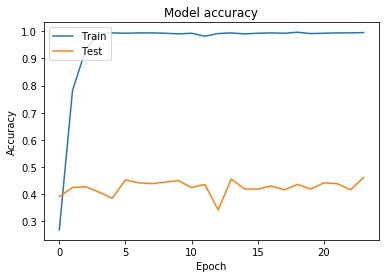

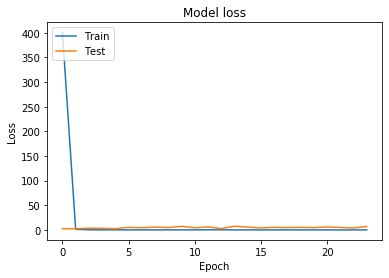

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
# 0 = Tim Kopra
# 1 = Thomas Marshburn
# 2 = Sunita Williams
# 3 = Shannon Walker
# 4 = Robert Behnken 
# 5 = Rex Walheim
# 6 = Peggy Whitson
# 7 = Kjell Lindgren
# 8 = Eric Boe
# 9 = Chris Cassidy

data = np.asarray(combined_num[8]).reshape((1, 224, 224, 3))
#first_picture.shape
prediction = model.predict(data)
print(prediction)

#num_array[0]
#num_array[0].shape

[[9.9998140e-01 4.7121682e-12 3.9381836e-09 2.0220902e-13 1.0628846e-14
  2.1584033e-13 1.8608556e-05 5.2292927e-12 3.5128441e-12 3.0919634e-10]]


In [43]:
# Displays image
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(combined_num[8], 'RGB')
#img.save('my.png')
img.show()

## CNN with 0.5 Dropout

In [53]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))
#model.add(Dense(9, activation="softmax"))

In [54]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=24)

Train on 822 samples, validate on 353 samples
Epoch 1/24
822/822 [==============================] - 200s 244ms/step - loss: 144.5852 - accuracy: 0.1898 - val_loss: 2.2987 - val_accuracy: 0.4476
Epoch 2/24
822/822 [==============================] - 167s 203ms/step - loss: 2.2868 - accuracy: 0.3516 - val_loss: 2.2830 - val_accuracy: 0.4674
Epoch 3/24
822/822 [==============================] - 191s 233ms/step - loss: 2.2710 - accuracy: 0.3905 - val_loss: 2.2667 - val_accuracy: 0.4703
Epoch 4/24
822/822 [==============================] - 167s 203ms/step - loss: 2.2536 - accuracy: 0.4100 - val_loss: 2.2503 - val_accuracy: 0.4703
Epoch 5/24
822/822 [==============================] - 165s 200ms/step - loss: 2.2348 - accuracy: 0.4148 - val_loss: 2.2341 - val_accuracy: 0.4703
Epoch 6/24
822/822 [==============================] - 227s 276ms/step - loss: 2.2165 - accuracy: 0.4221 - val_loss: 2.2173 - val_accuracy: 0.4674
Epoch 7/24
822/822 [==============================] - 172s 209ms/step - loss

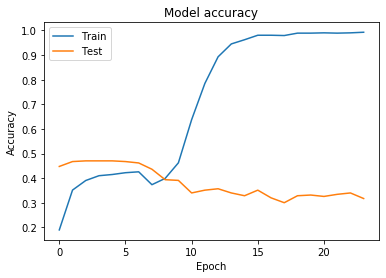

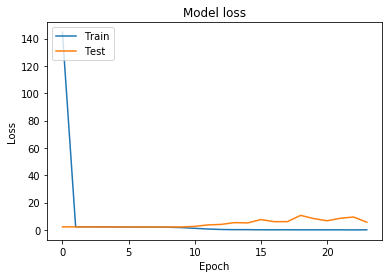

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## VGG

In [56]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [57]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [59]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 24s 0us/step


In [60]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x149d215d0> False
<keras.layers.convolutional.Conv2D object at 0x149af6290> False
<keras.layers.convolutional.Conv2D object at 0x149d21bd0> False
<keras.layers.pooling.MaxPooling2D object at 0x149d21b50> False
<keras.layers.convolutional.Conv2D object at 0x149ceb650> False
<keras.layers.convolutional.Conv2D object at 0x149ab7590> False
<keras.layers.pooling.MaxPooling2D object at 0x149ab7f10> False
<keras.layers.convolutional.Conv2D object at 0x149ac3b90> False
<keras.layers.convolutional.Conv2D object at 0x149ab9c10> False
<keras.layers.convolutional.Conv2D object at 0x149de4f50> False
<keras.layers.pooling.MaxPooling2D object at 0x149de49d0> False
<keras.layers.convolutional.Conv2D object at 0x149dc5fd0> False
<keras.layers.convolutional.Conv2D object at 0x149dd2090> False
<keras.layers.convolutional.Conv2D object at 0x149dd2850> False
<keras.layers.pooling.MaxPooling2D object at 0x149e15a50> False
<keras.layers.convolutional.Conv2D obj

In [61]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 40,416,074
Trainable params: 32,780,810
Non-trainable params: 7,635,264
_________________________________________________________________


In [69]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=24)

#H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
#	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
#	epochs=EPOCHS)

Train on 822 samples, validate on 353 samples
Epoch 1/24
822/822 [==============================] - 361s 439ms/step - loss: 2.3748 - accuracy: 0.3723 - val_loss: 2.2776 - val_accuracy: 0.4589
Epoch 2/24
822/822 [==============================] - 351s 427ms/step - loss: 2.2759 - accuracy: 0.4075 - val_loss: 2.2616 - val_accuracy: 0.4561
Epoch 3/24
822/822 [==============================] - 347s 422ms/step - loss: 2.2814 - accuracy: 0.3856 - val_loss: 2.2125 - val_accuracy: 0.4646
Epoch 4/24
822/822 [==============================] - 352s 429ms/step - loss: 2.2179 - accuracy: 0.4027 - val_loss: 2.1899 - val_accuracy: 0.4646
Epoch 5/24
822/822 [==============================] - 355s 432ms/step - loss: 2.0620 - accuracy: 0.3990 - val_loss: 2.1834 - val_accuracy: 0.4674
Epoch 6/24
822/822 [==============================] - 356s 433ms/step - loss: 1.9233 - accuracy: 0.4197 - val_loss: 2.0714 - val_accuracy: 0.4646
Epoch 7/24
822/822 [==============================] - 355s 432ms/step - loss: 

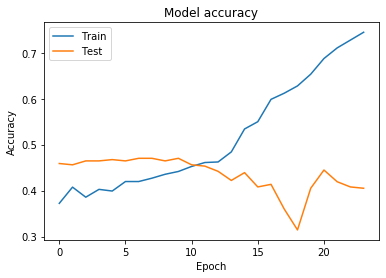

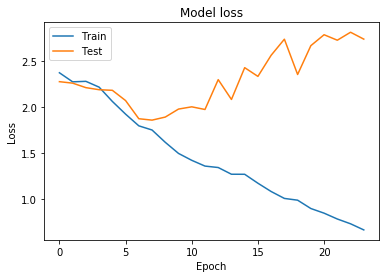

In [70]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [104]:
# 0 = Tim Kopra
# 1 = Thomas Marshburn
# 2 = Sunita Williams
# 3 = Shannon Walker
# 4 = Robert Behnken 
# 5 = Rex Walheim
# 6 = Peggy Whitson
# 7 = Kjell Lindgren
# 8 = Eric Boe
# 9 = Chris Cassidy

data = np.asarray(combined_num[8]).reshape((1, 224, 224, 3))
#first_picture.shape
prediction = model.predict(data)
print(prediction)

#num_array[0]
#num_array[0].shape

[[0.09421001 0.09382926 0.10462461 0.10275865 0.09241256 0.09991341
  0.09451814 0.10363439 0.10101706 0.11308196]]


In [1]:
# displays first image
#display(combined_num)

#from scipy.misc import imshow
#imshow(combined_num[2])


#from scipy.misc import toimage
#toimage(combined_num[2]).show()

from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(combined_num[8], 'RGB')
#img.save('my.png')
img.show()

NameError: name 'combined_num' is not defined

# References

In [ ]:
#https://stackoverflow.com/questions/37747021/create-numpy-array-of-images
#https://www.youtube.com/watch?v=D5xqcGk6LEc&t=32s
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/